In [1]:
# BF 550 homework 2
# Importing libraries for homework assignment
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Problem 1 - Part One, Matrix work
# creating a function to return the column means of a N x M data matrix


def mean(example_matrix): 
    variable_means = np.mean(example_matrix, axis = 0)
    return variable_means

# creating an example matrix
matrix_practice = np.array([[1,2,3],
                            [6,8,1],])

print(matrix_practice)

# testing out the function
mean_values = mean(matrix_practice)

print(f' column means ---> {mean_values}')

[[1 2 3]
 [6 8 1]]
 column means ---> [3.5 5.  2. ]


In [2]:
# Problem 1 Part 2
# Creating a custom function for covariance
practice_matrix = np.array([[1,2,3],[6,8,1]])
# importing libraries

# defining cov and the matrix
def covariance_matrix(practice_matrix):

    X = practice_matrix
 
    # calculating the mean matrix
    X_bar = np.mean(X, axis = 0)
    #finding the centered matrix by subtracting the original matrix by the mean
    X_center = X - X_bar
    
    cov_matrix = np.matmul(X_center.T, X_center)/2 #multiplying the centered matrix and TRANSPOSED centered matrix and dividing by 2.
    return(cov_matrix)#returning the covariance matrix

print(covariance_matrix(practice_matrix))






[[ 6.25  7.5  -2.5 ]
 [ 7.5   9.   -3.  ]
 [-2.5  -3.    1.  ]]


/var/folders/2p/fnj23ks15nl_fyqf44_f57vc0000gn/T/ipykernel_49050/4037392123.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_covid_data['date'] = pd.to_datetime(covid_data['date'])


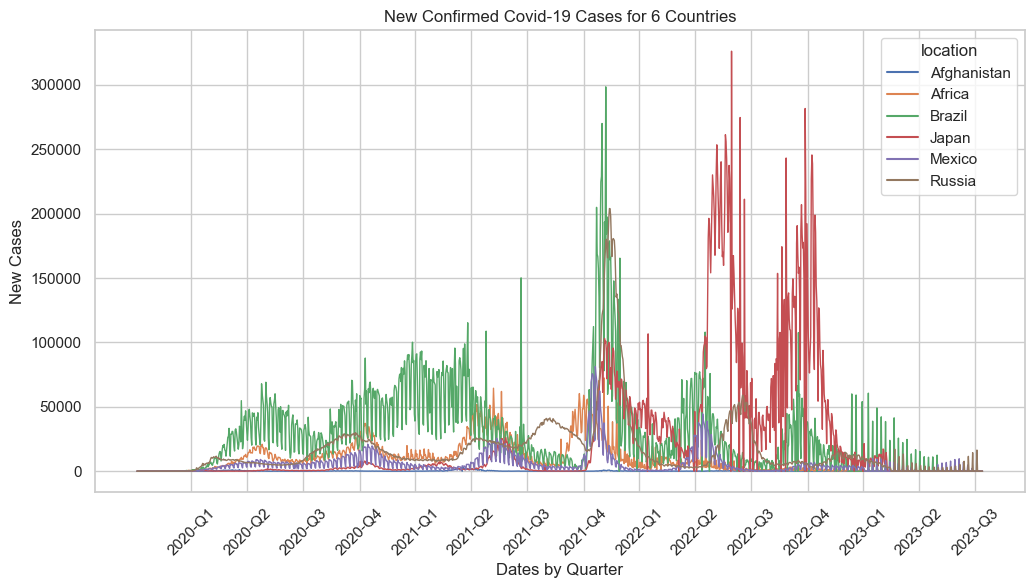

In [3]:

# Problem 1 Part 1  
# Data visualizations

#Loading in CSV data
covid_data = pd.read_csv('owid-covid-data.csv')

#Filtering the location column to only return 6 countries of my choosing using .loc and .isin
filtered_covid_data = covid_data.loc[covid_data['location'].isin(['Mexico', 'Africa', 'Russia', 'Brazil','Japan','Afghanistan' ])]
# Convert the 'date' column to a datetime object so I can manipulate the x-ticks
filtered_covid_data['date'] = pd.to_datetime(covid_data['date'])


plt.figure(figsize=(12, 6)) # increasing the size of the graph.
sns.set(style='whitegrid')

# creating a lineplot with seaborn
sns.lineplot(data=filtered_covid_data,
             x="date", y="new_cases", 
             hue="location", 
             linewidth=1)

# Set the x-axis labels to display quarterly intervals. I took creative liberties.
# this will take the range of the date column
date_ticks = pd.date_range(start=filtered_covid_data['date'].min(), end=filtered_covid_data['date'].max(), freq='Q')
# changes the xticks, also changes the rotation of xticks so it can be seen better
plt.xticks(date_ticks, [f'{quarter.year}-Q{quarter.quarter}' for quarter in date_ticks], rotation=45)

# Setting the labels and creating a title for the data.
plt.xlabel('Dates by Quarter')
plt.ylabel('New Cases')
plt.title("New Confirmed Covid-19 Cases for 6 Countries")

plt.show()
# A warning keeps popping up but the graph is outputting properly. 

In [5]:
# Problem 2 Part 2
# Reading in the CSV file
covid_map_df = pd.read_csv('owid-covid-data.csv')


# Pulling data from 2023 and 2020 for the maps. Using dropna to drop any rows that have null values in the 'new_cases' column.
data_2020_map = covid_map_df.query("date == '2020-09-11'").dropna(subset='total_cases')
data_2023_map = covid_map_df.query("date == '2023-09-01'").dropna(subset='total_cases')

# Create the choropleth maps
world_map = px.choropleth(data_2020_map, locations='location',
            color='total_cases',
            locationmode='country names',
            hover_name='location',
            range_color=(0,7*10e5), # hard coding the range values, had a hard time getting the range to be based off of the dataset
            color_continuous_scale='Viridis',
            title = 'Cumulative Cases of Covid-19 by Country 2020/09/11')
world_map.show()

world_map_2 = px.choropleth(data_2023_map, locations='location',
            color='total_cases',
            locationmode='country names',
            hover_name='location',
            range_color= (0,1.2*10e7), 
            color_continuous_scale='Viridis',
            title = 'Cumulative Cases of Covid-19 by Country 2023/09/01')
world_map_2.show()
